# Project   :

### Business Problem : Identifying the key drivers for estimating loan elgibility for the customer

### Statistical Problem :  Estimating loan amount is comes under Linear Regression problem.

In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data
data = pd.read_csv("H:/TechM-2/Week2-Assessment/Credit Card Data.csv")

In [3]:
#Data Understanding 
import pandas as pd

#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Bad_Flag
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1,0
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1,0
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2,0
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2,1
5,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,2,1,2,0
6,1,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,1,1,2,0
7,1,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,2,1,2,0
8,4,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1,0
9,2,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1,1


In [4]:
#Checking Missing values
sum(data.isnull().sum())

0

In [5]:
#Checking column  and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    1000 non-null int64
No of Credits at this Bank           10

In [6]:
#Checking Data Dimension
data.shape

(1000, 21)

### Data Analysis :

In [7]:
#Printing all columns in data set
data.columns

Index(['Account Balance', 'Duration of Credit (month)', 'Payment Status of Previous Credit', 'Purpose', 'Credit Amount', 'Value Savings/Stocks', 'Length of current employment', 'Instalment per cent', 'Sex & Marital Status', 'Guarantors', 'Duration in Current address', 'Most valuable available asset', 'Age (years)', 'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation', 'No of dependents', 'Telephone', 'Foreign Worker', 'Bad_Flag'], dtype='object')

In [8]:
#Renaming column with proper names
data.rename(columns={"Account Balance":"Account_Balance","Duration of Credit (month)":"Duration_Months","Payment Status of Previous Credit":"Payment_Status","Credit Amount":"Credit_Amount","Value Savings/Stocks":"Value_Savings","Length of current employment":"Length_of_current_employment","Instalment per cent":"Instalment_per_cent","Sex & Marital Status":"Marital_Status","Duration in Current address":"Duration_in_Current_address","Most valuable available asset":"Most_valuable_available_asset","Age (years)":"Age","Concurrent Credits":"Concurrent_Credits","Type of apartment":"Type_of_apartment","No of Credits at this Bank":"No_of_Credits_at_this_Bank","No of dependents":"No_of_dependents","Foreign Worker":"Foreign_Worker"},inplace=True)

In [9]:
# Univarite Analysis:

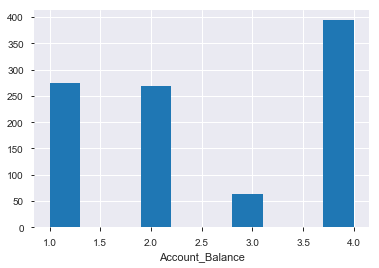

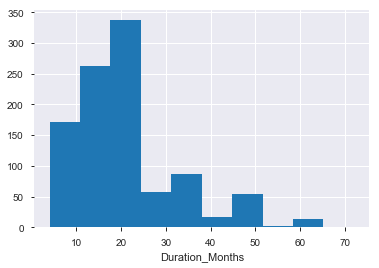

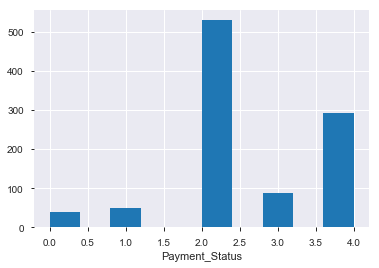

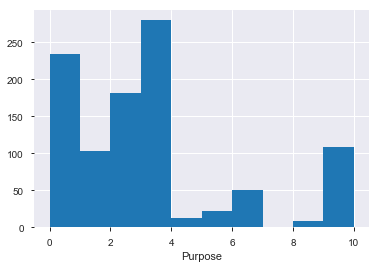

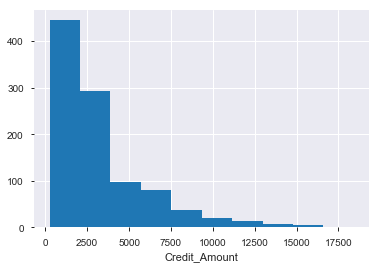

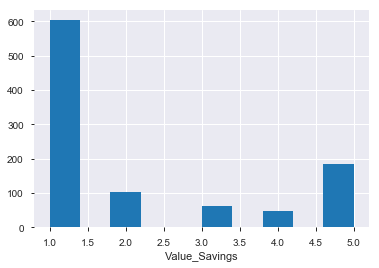

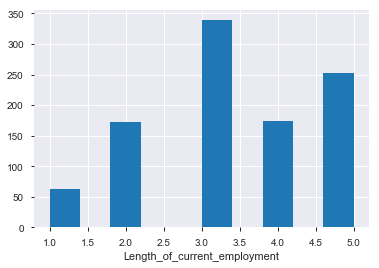

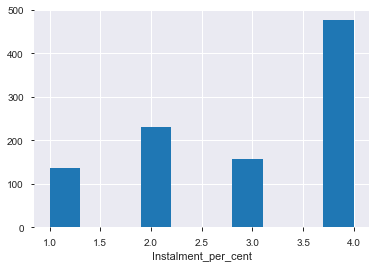

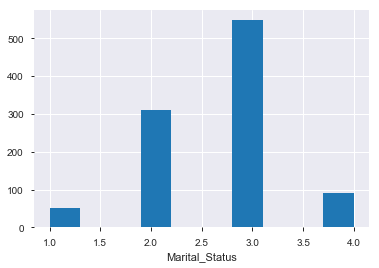

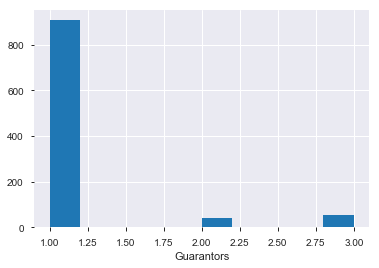

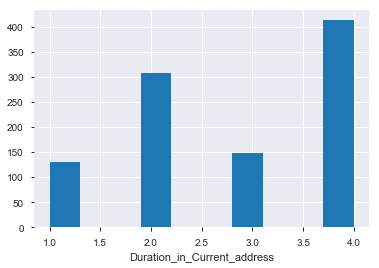

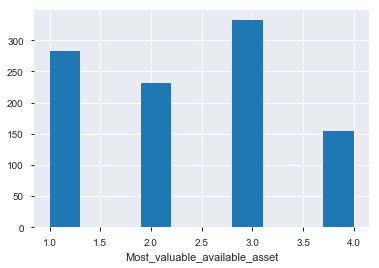

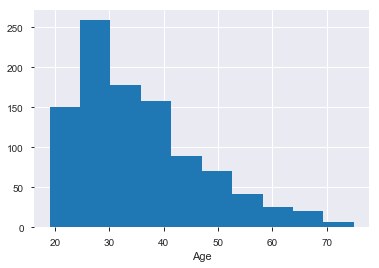

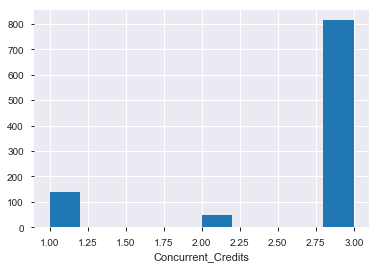

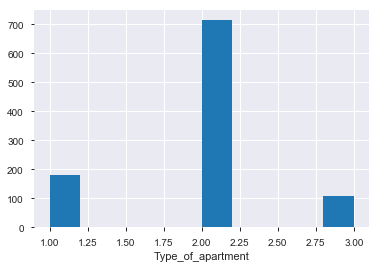

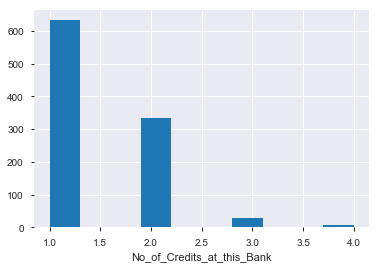

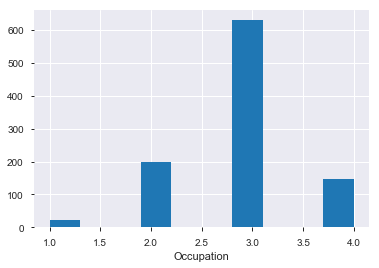

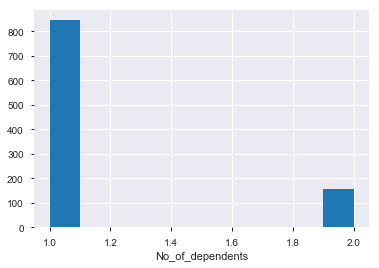

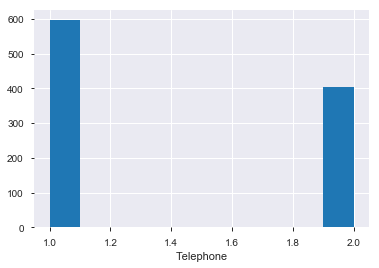

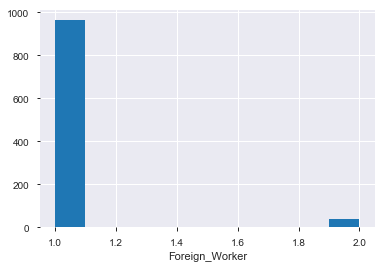

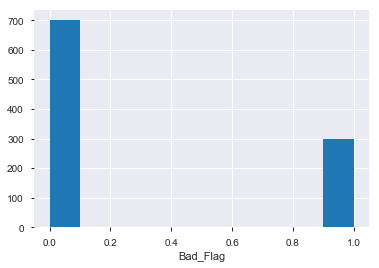

In [10]:
for i in data.columns:
    data[i].hist()
    plt.xlabel(str(i))
    plt.show()

In [11]:
# Insights from above plot

# --> From Payment Status 0,1 and 3 category customers are low. Chance of selecting category 2 and 4 customers are high.
# --> Credit Amount following Exponential distribution.
# --> Age Varible is similar to exponential distribtuion. 
# --> Most of the customers have 1 or 2 accounts in this bank
# --> More than 60% customers are from category 3 Occupation.
# --> More than 90% of customers belonging to 1 in Foreign_Worker Variable. This in Insignificant variable.
data.Guarantors.value_counts()

1    907
3     52
2     41
Name: Guarantors, dtype: int64

In [12]:
# Bivariate Analysis:

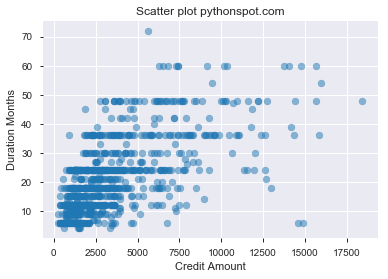

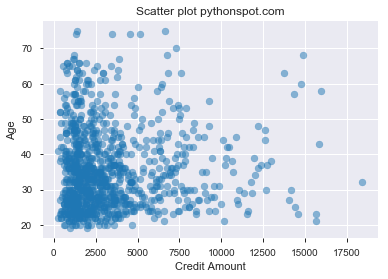

In [13]:
plt.scatter(data.Credit_Amount,data.Duration_Months, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Credit Amount')
plt.ylabel('Duration Months')
plt.show()

plt.scatter(data.Credit_Amount,data.Age, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Credit Amount')
plt.ylabel('Age')
plt.show()

In [14]:
# Credit_Amount and Age variables have positive Correlation.
# Credit Amount and Duration in Months variables having positive Correlation.

# Based on this Scatter Plot Months_Duration variable is Most Significant compared with Age variable.

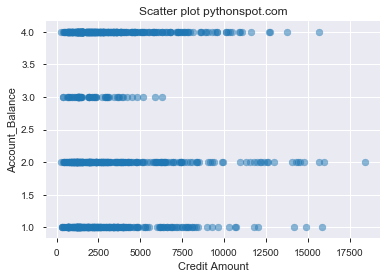

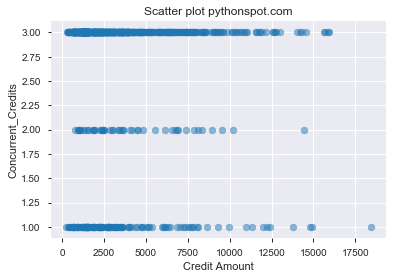

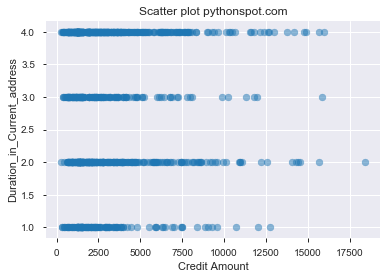

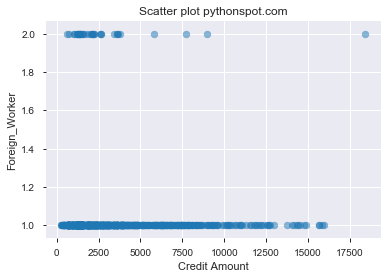

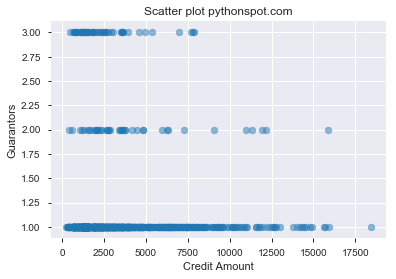

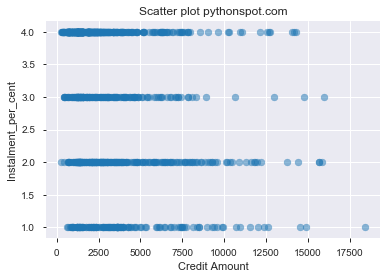

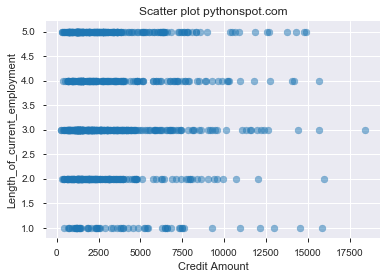

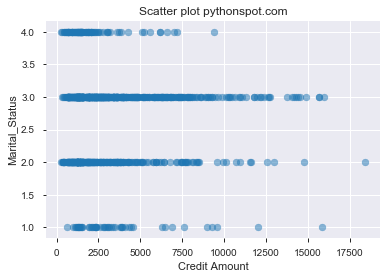

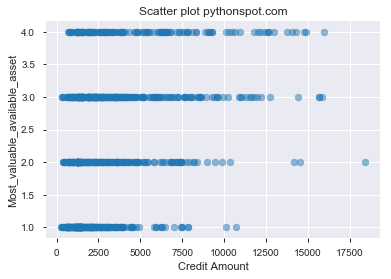

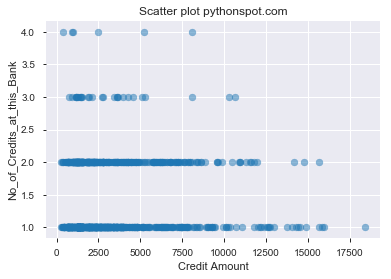

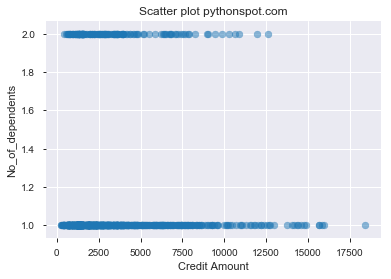

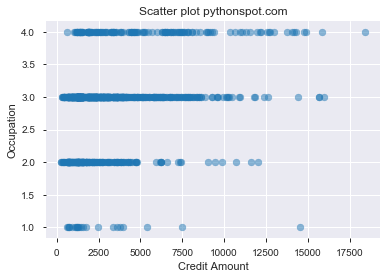

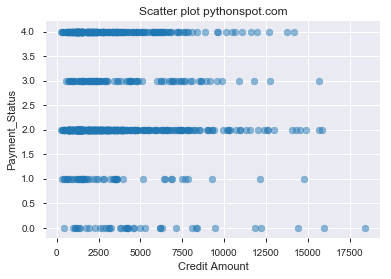

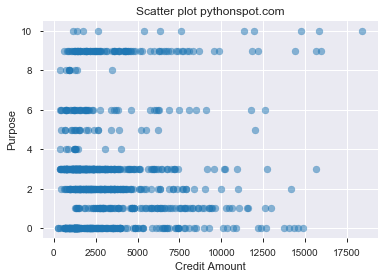

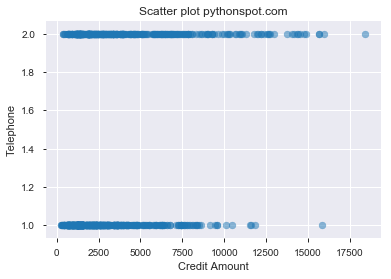

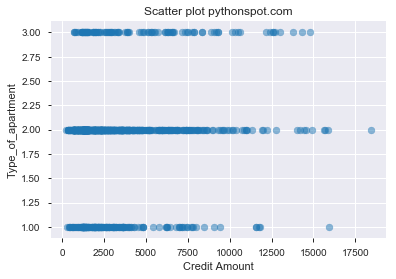

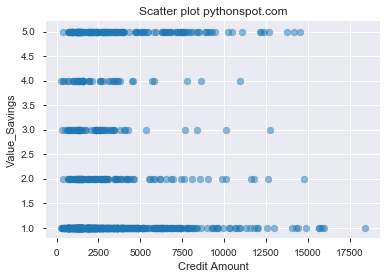

In [15]:
# Checking Bi-Variate Relationship with taget variable
for i in data.columns.difference(['Credit_Amount','Age','Duration_Months','Bad_Flag']):
    plt.scatter(data.Credit_Amount,data[i], alpha=0.5)
    plt.title('Scatter plot pythonspot.com')
    plt.xlabel('Credit Amount')
    plt.ylabel(str(i))
    plt.show()  

In [16]:
#Insights from above plots

#--> if the customers from Account_Balance category is 3 then their Credit Amount is Low
#--> Most of the customers belonging to 1 category in Foreign_Worker variable.
#--> Customers from four category in Purpose variable have low Credit Amount Value.

### Data Preparation :

In [17]:
#Seperating numerical columns
#Continuous Variables : Duration_Months, Credit_Amount, Age
data_num = data.loc[:,("Duration_Months","Credit_Amount","Age")]

In [18]:
#Creating summary for numerical columns
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [19]:
#Implementing user defined summary function
data_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Duration_Months,1000.0,0.0,20903.0,20.903,18.0,12.058814,1.454150e+02,0.576894,4.0,6.00,6.00,9.0,12.0,18.0,24.00,36.0,48.0,60.00,72.0
Credit_Amount,1000.0,0.0,3271248.0,3271.248,2319.5,2822.751760,7.967927e+06,0.862898,250.0,425.83,708.95,934.7,1365.5,2319.5,3972.25,7179.4,9162.7,14180.39,18424.0
Age,1000.0,0.0,35542.0,35.542,33.0,11.352670,1.288831e+02,0.319416,19.0,20.00,22.00,23.0,27.0,33.0,42.00,52.0,60.0,67.01,75.0


In [20]:
#Outlier treatment
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

#Implementing outlier function 
data_num=data_num.apply(outlier_capping)

In [21]:
#Categorical Variables:
### Ordinal Variables: Account_Balance, Concurrent_Credits, Duration_in_Current_address, Instalment_per_cent, Length_of_current_employment, No_of_Credits_at_this_Bank, Value_Savings  
### Nominal Variables: Bad_Flag, Foreign_Worker, Guarantors, Marital_Status, Most_valuable_available_asset, No_of_dependents, Occupation, Payment_Status, Purpose, Telephone, Type_of_apartment 
data_cat = data.loc[:,(data.columns.difference(["Duration_Months","Credit_Amount","Age"]))]

In [22]:
#Seperating nominal columns in Categorical variables
nom_cal = data_cat.columns.difference(["Account_Balance","Concurrent_Credits","Duration_in_Current_address","Instalment_per_cent","Length_of_current_employment","No_of_Credits_at_this_Bank","Value_Savings","Bad_Flag"])

In [23]:
#Creating dummies for nominal categorical variables
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in nom_cal:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

In [24]:
data_cat.head()

,Account_Balance,Bad_Flag,Concurrent_Credits,Duration_in_Current_address,Instalment_per_cent,Length_of_current_employment,No_of_Credits_at_this_Bank,Value_Savings,Foreign_Worker_2,Guarantors_2,Guarantors_3,Marital_Status_2,Marital_Status_3,Marital_Status_4,Most_valuable_available_asset_2,Most_valuable_available_asset_3,Most_valuable_available_asset_4,No_of_dependents_2,Occupation_2,Occupation_3,Occupation_4,Payment_Status_1,Payment_Status_2,Payment_Status_3,Payment_Status_4,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_8,Purpose_9,Purpose_10,Telephone_2,Type_of_apartment_2,Type_of_apartment_3
0,1,0,3,4,4,2,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,1,3,2,2,3,2,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,3,4,2,4,1,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,3,2,3,3,2,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,4,4,3,2,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
#Combining both categorical and Continuous data
data_final = pd.concat([data_num,data_cat],axis=1)

# Linear Regression

#### Normality Checking

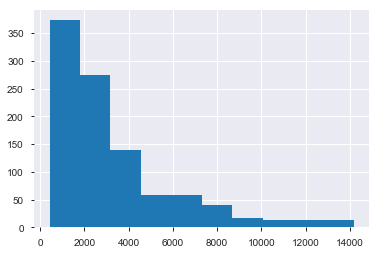

In [26]:
#Checking the Distribution of Credit_Amount
# Target variable following Exponential distribution.
data_final.Credit_Amount.hist()

In [27]:
#Applying transformation for target variable to make it into Near normal
data_final['Credit_Amount'] = np.log(data_final.Credit_Amount)

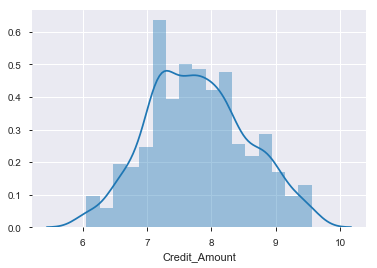

In [28]:
#Plotting transformed dependent variable
sns.distplot(data_final.Credit_Amount)

#### Variable Reduction

In [29]:
#Selecting features
features = data_final[data_final.columns.difference( ['Credit_Amount'] )]
target = data_final['Credit_Amount']

In [30]:
#RFE

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#import itertools

#Checking RFE 

lm = LinearRegression()
#create the RFE model and select 30 attributes
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(features, target)

In [32]:
#Alternative of capturing the important variables
RFE_features=features.columns[rfe.get_support()]
features1 = features[RFE_features]

#### F - Regression

In [33]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features1, target )

In [34]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features1.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [35]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(20)

In [36]:
f_reg_results

,Variable,F_Value,P_Value
14,Occupation_4,92.554746,0.000
27,Telephone_2,78.342780,0.000
26,Purpose_9,14.287114,0.000
21,Purpose_3,33.552750,0.000
19,Purpose_1,86.630936,0.000
17,Payment_Status_3,14.318364,0.000
28,Type_of_apartment_2,13.760243,0.000
12,Occupation_2,41.198707,0.000
11,Most_valuable_available_asset_4,54.742307,0.000
10,Most_valuable_available_asset_3,12.322454,0.000


#### Train and Test data

In [37]:
#Splitting data into training and testing data sets
train_reg, test_reg = train_test_split(data_final, test_size = 0.3)

### Modeling 

In [38]:
model_reg = sm.ols('Credit_Amount~Telephone_2+Purpose_10+Purpose_1+Occupation_4+Marital_Status_4+Type_of_apartment_3+Duration_Months+Marital_Status_3+Instalment_per_cent+Guarantors_2+Most_valuable_available_asset_3',data = train_reg).fit()

In [39]:
print(model_reg.summary2())

                        Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.615    
Dependent Variable:       Credit_Amount        AIC:                    936.7544 
Date:                     2019-08-20 20:19     BIC:                    991.3673 
No. Observations:         700                  Log-Likelihood:         -456.38  
Df Model:                 11                   F-statistic:            102.6    
Df Residuals:             688                  Prob (F-statistic):     5.73e-137
R-squared:                0.621                Scale:                  0.21945  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                        7.4723   0.0615 121.5053 0.0000  7.3515  7.5930
Telephone_2                      0.1192   0.0396   3.

In [40]:
#Transforming log values into actual values in both training and testing data sets
train_reg['pred'] =np.exp(model_reg.predict(train_reg))
test_reg['pred'] =np.exp(model_reg.predict(test_reg))
train_reg['Credit_Amount'] = np.exp(train_reg.Credit_Amount)
test_reg['Credit_Amount'] = np.exp(test_reg.Credit_Amount)

In [41]:
#Checking Metrics for both training and testing data sets

print("MAPE for Training and testing data sets:")
MAPE_train = np.mean(np.abs(train_reg.Credit_Amount - train_reg.pred)/train_reg.Credit_Amount)
print(MAPE_train)
MAPE_train = np.mean(np.abs(test_reg.Credit_Amount - test_reg.pred)/test_reg.Credit_Amount)
print(MAPE_train)
print("\nMSE for Training and testing data sets:")
#MSE for training and testing data sets                           
print(metrics.mean_squared_error(train_reg.Credit_Amount,train_reg.pred)) 
print(metrics.mean_squared_error(test_reg.Credit_Amount,test_reg.pred))
print("\nRMSE for Training and testing data sets:")
#RMSE for training and testing data sets                           
print(np.sqrt(metrics.mean_squared_error(train_reg.Credit_Amount,train_reg.pred)))
print(np.sqrt(metrics.mean_squared_error(test_reg.Credit_Amount,test_reg.pred)))

MAPE for Training and testing data sets:
0.3942226576849099
0.4112429988999371

MSE for Training and testing data sets:
3333657.119640823
5477694.150349056

RMSE for Training and testing data sets:
1825.8305287295486
2340.4474252478


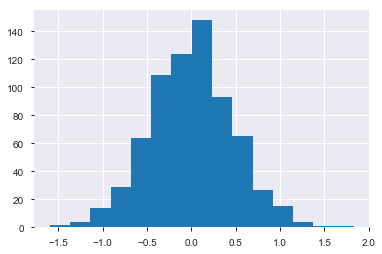

In [42]:
#Checking Errors distribution
model_reg.resid.hist(bins=15)
model_reg.resid.to_csv("Residual.csv")
# Residuals following Normal distribution. This is one of the Assumption in Linear Regression.

In [43]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train_reg['Deciles']=pd.qcut(train_reg['pred'],10, labels=False)
test_reg['Deciles']=pd.qcut(test_reg['pred'],10, labels=False)

In [44]:
# Decile Analysis for train data
Predicted_avg = train_reg[['Deciles','pred']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = train_reg[['Deciles','Credit_Amount']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['Credit_Amount']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

,pred,Credit_Amount
Deciles,,
9,8503.628429,7891.108000
8,4421.934673,5015.662714
7,3220.451314,3960.657143
6,2634.564193,3108.463768
5,2255.895199,3108.484366
4,1972.191103,2168.500000
3,1728.253390,1785.071429
2,1497.400575,1593.942857
1,1286.126532,1320.009851


In [45]:
# Decile Analysis for train data
Predicted_avg = test_reg[['Deciles','pred']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = test_reg[['Deciles','Credit_Amount']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['Credit_Amount']

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test


,pred,Credit_Amount
Deciles,,
9,10453.967907,8077.726000
8,5469.048169,7029.746333
7,4054.697658,5223.000000
6,3072.210724,3809.846333
5,2458.852791,3274.500000
4,2127.545735,2167.500000
3,1868.005401,2261.062500
2,1535.137317,1975.066667
1,1252.410837,1270.527667


In [46]:
#Exporting Decile analysis in csv formate
#Decile_analysis_train.to_csv('Decile_analysis_train.csv')
#Decile_analysis_test.to_csv('Decile_analysis_test.csv')

## Machine Learning 

In [47]:
#Independent columns
Ind_col = data_final.columns.difference(['Credit_Amount','pred'])

In [48]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(data_final[Ind_col],data_final.Credit_Amount, test_size=0.3, random_state=6)

In [49]:
# Importing Required Packages
from sklearn.linear_model import Ridge,Lasso

In [50]:
# Ridge Regression

In [51]:
Ridge_Reg = Ridge(alpha=0.0001,normalize=True)
Ridge_Reg.fit(train_x,train_y)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [52]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -Ridge_Reg.predict(train_x))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- Ridge_Reg.predict(test_x))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,Ridge_Reg.predict(train_x)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,Ridge_Reg.predict(test_x)))
print(RMSE_test)

MAPE values for training and testing data :
0.047315366008830496
0.04485809572849476

RMSE values for training and testing data :
0.4619881055243669
0.44159340976500955


In [53]:
# Lasso Regression :

In [54]:
Lasso_Reg = Lasso(alpha=0.0001,normalize=True)
Lasso_Reg.fit(train_x,train_y)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -Lasso_Reg.predict(train_x))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- Lasso_Reg.predict(test_x))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,Lasso_Reg.predict(train_x)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,Lasso_Reg.predict(test_x)))
print(RMSE_test)

MAPE values for training and testing data :
0.0475460888893697
0.04480658519919818

RMSE values for training and testing data :
0.46298038922387846
0.44207398591994135


### Decision Trees :

In [56]:
#Importing packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [57]:
#Model building
param_grid = {'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7)}
data_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 3)
data_tree.fit(train_x,train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4]), 'max_features': array([4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
#Predicting values for both training and testing data sets
tree_train_pred= data_tree.predict(train_x)
tree_test_pred=data_tree.predict(test_x)

In [59]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -tree_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- tree_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,tree_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,tree_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.07228007593923663
0.07209380653221828

RMSE values for training and testing data :
0.6865958385220232
0.6984861062390402


## 2.Ensemble Learining

### 2.1 Bagging

In [60]:
#Importing required packages
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
#Model building
pargrid_ada = {'n_estimators': [50,60,70,80,100]}

gscv_bagging = GridSearchCV(estimator=BaggingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)

data_bagg =gscv_bagging.fit(train_x, train_y)

In [62]:
#Predicting values for both training and testing data sets
bagg_train_pred=data_bagg.predict(train_x)
bagg_test_pred=data_bagg.predict(test_x)

In [63]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - bagg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- bagg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,bagg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,bagg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.019161871283241098
0.04857263917248407

RMSE values for training and testing data :
0.19145201511187732
0.48134083618919715


### 2.2 Random Forest

In [64]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)
data_rf.fit(train_x,train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 60, 70, 80, 100], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
#Predicting values for both training and testing data sets
rf_train_pred=data_rf.predict(train_x)
rf_test_pred=data_rf.predict(test_x)

In [66]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - rf_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- rf_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,rf_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,rf_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.048138296843052736
0.050994030348395135

RMSE values for training and testing data :
0.469190037833315
0.5032625962521959


### 2.3 Boosting

#### Ada Boost

In [68]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_boost=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    5.7s finished


In [69]:
#Predicting values for both training and testing data sets
boost_train_pred=data_boost.predict(train_x)
boost_test_pred=data_boost.predict(test_x)

In [70]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - boost_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- boost_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,boost_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,boost_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.05069861784000937
0.049702133837465946

RMSE values for training and testing data :
0.4689358492263003
0.4828971035038979


#### Gradient boost

In [72]:
pargrid_ada = {'n_estimators': [60,70,80,100],
               'max_depth':[2,3,4,5],
               'learning_rate': [10 ** x for x in range(-4, 2)]}

gscv_ada = GridSearchCV(estimator=GradientBoostingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,
                        verbose=True, n_jobs=-1)

data_gbm=gscv_ada.fit(train_x, train_y)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   13.1s finished


In [73]:
#Predicting values for both training and testing data sets
gbm_train_pred=data_gbm.predict(train_x)
gbm_test_pred=data_gbm.predict(test_x)

In [74]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - gbm_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- gbm_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,gbm_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,gbm_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.04286130644711438
0.04502992190350797

RMSE values for training and testing data :
0.41881771855591254
0.44785635354675585


#### XGBoost

In [77]:
#Importing Required packages
import xgboost

In [84]:
pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

data_xg=gscv_xg.fit(train_x, train_y)

[20:34:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
#Predicting values for both training and testing data sets
xg_train_pred=data_xg.predict(train_x)
xg_test_pred=data_xg.predict(test_x)

In [86]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - xg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- xg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,xg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,xg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.043102635724683376
0.04515921825183821

RMSE values for training and testing data :
0.421957063625261
0.4521619847201175


### K - Nearest Neighbours

In [88]:
#Importing required modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [89]:
#Standardising the data because KNN is distance based algorithm 
scaler = StandardScaler()
train_X = scaler.fit_transform(train_x)
test_X = scaler.fit_transform(test_x)

In [90]:
#Model Building using different tuning parameters
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11],
                    'leaf_size':[20,30,40,50,60]}]

knn_reg = GridSearchCV(KNeighborsRegressor(),
                   tuned_parameters,
                   cv=3)

data_knn = knn_reg.fit(train_X,train_y)

In [91]:
#Predicting values for both training and testing data sets
knn_train_pred=data_knn.predict(train_X)
knn_test_pred=data_knn.predict(test_X)

In [92]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - knn_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- knn_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,knn_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,knn_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.06190970997559137
0.06028730978490841

RMSE values for training and testing data :
0.592294637500594
0.5955095771672168


## SVM(Support Vector Machine) 

In [93]:
#Importing required modules
from sklearn.svm import SVR
from sklearn.svm import LinearSVR 

In [94]:
#Model building using Linear svm 
tuned_parameters = [{'C': [1,0.1,0.001,10,100],
                    'gamma':[0.0001, 0.001, 0.01, 0.1],
                    'kernel':['linear','rbf','poly']}]

svr_reg = GridSearchCV(SVR(),
                   tuned_parameters,
                   cv=3)

data_svr = svr_reg.fit(train_X,train_y)

In [95]:
#Predicting values for both training and testing data sets
L_svr_train_pred=data_svr.predict(train_x)
L_svr_test_pred=data_svr.predict(test_x)

In [96]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - L_svr_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- L_svr_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,L_svr_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,L_svr_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.12377395502019777
0.1313000172078214

RMSE values for training and testing data :
1.1844788636706438
1.2319279108025882


## ANN(Artificial Neural Network)

In [97]:
#Importing required Module
from sklearn.neural_network import MLPRegressor

In [98]:
pargrid_ann = {'activation': ['relu','tanh','logistic','identity'],
               'alpha':[0.0001,0.001,0.01,1,10,100,1000]}

ann_reg = GridSearchCV(MLPRegressor(),pargrid_ann,cv=3)

data_ann = ann_reg.fit(train_X,train_y)

In [99]:
#Predicting values for both training and testing data sets
ann_train_pred=data_ann.predict(train_X)
ann_test_pred=data_ann.predict(test_X)

In [100]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - ann_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- ann_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,ann_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,ann_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.047512390822412716
0.044580744295911114

RMSE values for training and testing data :
0.4616546839525147
0.43854455643269197


# --------------------------------------------------------------------------------------------------------------
